# DATA MODELING

#### Import Libraries

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

#### Read & Store Data

In [27]:
df_clean = pd.read_csv('DiabetesCleaned_2018.csv', index_col=0) # Read csv file

#### Copy Data

In [28]:
df_model = df_clean.copy()

#### Sample Data

In [29]:
all_ones  = df_clean.loc[df_model['DIABETES'] == 1]
all_zeros = df_clean.loc[df_model['DIABETES'] == 0]

print("{} is the length of all_ones".format(len(all_ones)))
print("{} is the length of all_zeros".format(len(all_zeros)))

52851 is the length of all_ones
336717 is the length of all_zeros


In [30]:
sampled_ones = all_ones.sample(n=30000)
samples_zeros = all_zeros.sample(n=30000)

print("{} is the length of sampled_ones".format(len(sampled_ones)))
print("{} is the length of samples_zeros".format(len(samples_zeros)))

30000 is the length of sampled_ones
30000 is the length of samples_zeros


In [56]:
df_model = pd.concat((sampled_ones, samples_zeros), axis=0)
df_model = df_model.sample(frac=1)

In [57]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 103107 to 343215
Data columns (total 19 columns):
EXERCISE                60000 non-null float64
HEARTATTACK             60000 non-null float64
CORONARYHEARTDISEASE    60000 non-null float64
STROKE                  60000 non-null float64
ASTHMA                  60000 non-null float64
SKINCANCER              60000 non-null float64
OTHERCANCER             60000 non-null float64
CHRONICBRONCHITIS       60000 non-null float64
ARTHRITIS               60000 non-null float64
DEPRESSIVEDISORDER      60000 non-null float64
KIDNEYDISEASE           60000 non-null float64
DIABETES                60000 non-null float64
SLEEPTIME_GROUP         60000 non-null object
SEX_GROUP               60000 non-null object
WEIGHT_KILOGRAM         60000 non-null float64
HEIGHT_METER            60000 non-null float64
BMI_GROUP               60000 non-null object
RACE_GROUP              60000 non-null object
AGE_GROUP               60000 non-null obje

#### Split Data (Independent Variables & Depedent Varaibles)

In [58]:
dependentVar = 'DIABETES'

X = df_model.loc[:, df_model.columns != dependentVar]
y = df_model[dependentVar].values

print("Number of observations and dimensions in 'X':", X.shape)
print("Number of observations in 'y':", y.shape)

Number of observations and dimensions in 'X': (60000, 18)
Number of observations in 'y': (60000,)


In [59]:
print(X, '\n')
print(y)

        EXERCISE  HEARTATTACK  CORONARYHEARTDISEASE  STROKE  ASTHMA  \
103107       0.0          1.0                   0.0     0.0     0.0   
327226       1.0          0.0                   0.0     0.0     0.0   
95481        1.0          0.0                   0.0     0.0     0.0   
97200        1.0          0.0                   0.0     0.0     0.0   
263904       1.0          0.0                   0.0     0.0     0.0   
...          ...          ...                   ...     ...     ...   
336805       0.0          0.0                   0.0     0.0     0.0   
232717       0.0          0.0                   0.0     0.0     0.0   
289980       1.0          0.0                   0.0     0.0     0.0   
228744       1.0          0.0                   0.0     0.0     0.0   
343215       1.0          0.0                   0.0     0.0     0.0   

        SKINCANCER  OTHERCANCER  CHRONICBRONCHITIS  ARTHRITIS  \
103107         0.0          0.0                0.0        1.0   
327226         0.

#### Encode Independent Variables (X)

In [60]:
X = pd.get_dummies(X)

X.shape

(60000, 32)

In [61]:
features = X.columns.tolist()

features

['EXERCISE',
 'HEARTATTACK',
 'CORONARYHEARTDISEASE',
 'STROKE',
 'ASTHMA',
 'SKINCANCER',
 'OTHERCANCER',
 'CHRONICBRONCHITIS',
 'ARTHRITIS',
 'DEPRESSIVEDISORDER',
 'KIDNEYDISEASE',
 'WEIGHT_KILOGRAM',
 'HEIGHT_METER',
 'SLEEPTIME_GROUP_LessSleep',
 'SLEEPTIME_GROUP_NormalSleep',
 'SLEEPTIME_GROUP_OverSleep',
 'SEX_GROUP_Female',
 'SEX_GROUP_Male',
 'BMI_GROUP_NormalWeight',
 'BMI_GROUP_Obese',
 'BMI_GROUP_OverWeight',
 'BMI_GROUP_UnderWeight',
 'RACE_GROUP_AmericanIndian',
 'RACE_GROUP_Asian',
 'RACE_GROUP_Black',
 'RACE_GROUP_Hispanic',
 'RACE_GROUP_Other',
 'RACE_GROUP_White',
 'AGE_GROUP_Adult',
 'AGE_GROUP_Elderly',
 'AGE_GROUP_OldAdult',
 'AGE_GROUP_YoungAdult']

#### Feature Scaling
* Use feature scaling so that columns that have higher # values dont trumph columns with lower values - Euclidean Distance is calculated
* Standardization: Xstand = (x - mean(x)) / stdev(x)
* Normalization: Xnorm = (x - min(x)) / (max(x) - min(x))

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

print(X)

[[-1.52190658  3.05518201 -0.33237572 ... -0.88673507  1.51321988
  -0.34666445]
 [ 0.65707055 -0.32731274 -0.33237572 ... -0.88673507 -0.66084249
   2.88463383]
 [ 0.65707055 -0.32731274 -0.33237572 ... -0.88673507 -0.66084249
  -0.34666445]
 ...
 [ 0.65707055 -0.32731274 -0.33237572 ... -0.88673507  1.51321988
  -0.34666445]
 [ 0.65707055 -0.32731274 -0.33237572 ...  1.12773255 -0.66084249
  -0.34666445]
 [ 0.65707055 -0.32731274 -0.33237572 ...  1.12773255 -0.66084249
  -0.34666445]]


#### Principal Component Analysis

In [63]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver='full')
X = pca.fit_transform(X)

print(X)

[[ 2.69367107  3.43190302]
 [-2.2607451  -2.78252873]
 [-1.28671513 -0.73590116]
 ...
 [ 1.06818377 -0.91575527]
 [-1.33914353  0.1289404 ]
 [-1.42648268 -0.08810811]]


#### Split Data (Train & Test)

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print("Number of observations and dimensions in training set:", X_train.shape)
print("Number of observations and dimensions in test set:", X_test.shape)
print("Number of observations in training set:", y_train.shape)
print("Number of observations in test set:", y_test.shape)

Number of observations and dimensions in training set: (45000, 2)
Number of observations and dimensions in test set: (15000, 2)
Number of observations in training set: (45000,)
Number of observations in test set: (15000,)


## Logistic Regression

p = 1 / (1 + e^-y)  (sigmoid function) <br>
ln(p/(1-p) = b0 + b1*x
- y  = dependent variable
- x = independent varaible
- b0 = constant
- b1 = coefficient
- p = probability

#### Hyperparameter Tuning

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    'max_iter': [100, 200, 500, 1000],                              # Number of iterations
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   # Algorithm to use for optimization
    #'class_weight': ['balanced']                                   # Troubleshoot unbalanced data sampling
}

gdLR = GridSearchCV(estimator=LogisticRegression(random_state=1234), param_grid=param_grid_lr, verbose=True, 
                    cv=3, n_jobs=-1)
gdLR.fit(X_train, y_train)
print(gdLR.best_score_)
print(gdLR.best_estimator_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:    1.9s remaining:    0.6s


0.6788666666666666
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1234, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished


#### Build Model on Training Data

In [66]:
logModel = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1234, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
logModel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1234, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

#### Predict on Testing Data

In [67]:
y_pred = logModel.predict(X_test)
print(y_pred)

[0. 1. 0. ... 0. 1. 1.]


#### Numeric Analysis

In [68]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix \n")

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")

from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred), ": is the precision score")

from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred), ": is the recall score")

[[5181 2311]
 [2522 4986]] : is the confusion matrix 

0.6778 : is the accuracy score
0.6832945045909278 : is the precision score
0.6640916355887054 : is the recall score


*From Confusion Matrix:* <br>
    - 5181 is actually 0 (not diabetic) and predicted 0 (not diabetic)
    - 2311 is actually 0 (not diabetic) and predicted 1 (diabetic)
    - 2522 is actually 1 (diabetic) and predicted 0 (not diabetic)
    - 4986 is actually 1 (diabetic) and predicted 1 (diabetic)

*From Accuracy Score:* <br>
    - 0.6778 = [5181 + 4986] / [5181 + 2311 + 2522 + 4986] (How accurate is your model?)

*From Precision Score:* <br>
    - 0.6833 = [4986] / [2311 + 4986] (How many selected items are relevant?)

*From Recall Score:* <br>
    - 0.6641 = [4986] / [2522 + 4986] (How many relevant items are selected?)

#### Graphical Analysis

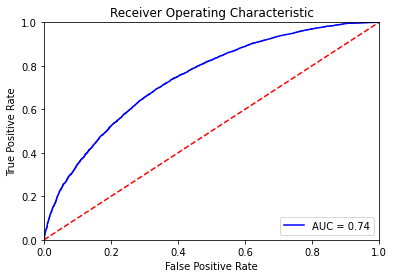

In [112]:
from sklearn.metrics import roc_curve, auc

probs = logModel.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

*From ROC Curve:* <br>
    - The Area Under the Curve (AUC) is 0.74
    - The higher the AUC the better the model
    - The curve is better than random prediction

## K-Nearest Neighbors

- Step 1: Chose the number K of neighbors
- Step 2: Take the K nearest neighbors of the new data point according to the Euclidean distance
- Step 3: Amoung these K neighbors, count the number of data points in each category
- Step 4: Assign the new data point to the category where you counted the most neighbors and then model is ready!

Note: Euclidean Distance bt P1 and P2 = $\sqrt{(x2-x1)^2 + (y2-y1)^2}$ <br>
Note: if K is too small it takes the local point and if K is too large then it takes the majority of points

#### Hyperparameter Tuning

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid_knn = {
    'n_neighbors': [5, 10, 15],                                      # Number of K
    #'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],         # Algorithm to compute nearest neighbors
    'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev']   # Algorithm to find the distance
}

gdKNN = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, verbose=True, 
                     cv=3, n_jobs=-1)
gdKNN.fit(X_train, y_train)
print(gdKNN.best_score_)
print(gdKNN.best_estimator_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


0.6609111111111111
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    3.5s finished


#### Build Model on Training Data

In [70]:
from sklearn.neighbors import KNeighborsClassifier
kNNModel = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')
kNNModel.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

#### Predict on Testing Data

In [71]:
y_pred = kNNModel.predict(X_test)
print(y_pred)

[1. 1. 0. ... 0. 1. 1.]


#### Numeric Analysis

In [72]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix \n")

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")

from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred), ": is the precision score")

from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred), ": is the recall score")

[[4799 2693]
 [2385 5123]] : is the confusion matrix 

0.6614666666666666 : is the accuracy score
0.6554503582395087 : is the precision score
0.6823388385721897 : is the recall score


#### Graphical Analysis

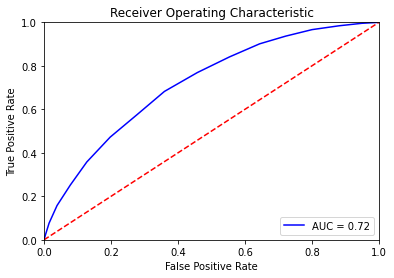

In [113]:
from sklearn.metrics import roc_curve, auc

probs = kNNModel.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Kernal Support Vector Machine

- Linear Kernal: f(X) = w^T * X + b
- Polynominal Kernal: f(X1, X2) = (a + X1^T * X2) ^ b
- Gaussian RBF Kernal: f(X1, X2) = exp(-gamma * ||X1 - X2||^2)
- Sigmoid Kernal: f(X, y) = tanh(alpha * X^T * y + C)


Note: To project from 2D space into 3D space we need use feature mapping where a hyperplane will seperate the two classes of y = 1 and y = 0. However mapping to a higher dimentional space can be higly compute-intensive so thats why we use the kernal trick instead to avoid going into higher dimentional space.

#### Hyperparameter Tuning

In [74]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid_svc = {
    'C': [0.1, 1, 10, 100],                           # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],                   # Kernel coef for ‘rbf’, ‘poly’ and ‘sigmoid’
    #'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel type to be used in the algorithm
    #'degree': [1, 2, 3, 4, 5, 6],                    # Degree for ‘poly’
    #'class_weight': ['balanced']                     # Troubleshoot unbalanced data sampling
}

gdSVC = GridSearchCV(estimator=SVC(random_state=1234), param_grid=param_grid_svc, verbose=True, 
                     cv=2, n_jobs=-1)
gdSVC.fit(X_train, y_train)           
print(gdSVC.best_score_)
print(gdSVC.best_estimator_)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:  9.0min finished


0.6847555555555556
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=1234, shrinking=True, tol=0.001,
    verbose=False)


#### Build Model on Training Data

In [121]:
from sklearn.svm import SVC
svmModel = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=True, random_state=1234, shrinking=True, tol=0.001,
    verbose=False)
svmModel.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=True, random_state=1234, shrinking=True, tol=0.001,
    verbose=False)

#### Predict on Testing Data

In [122]:
y_pred = svmModel.predict(X_test)
print(y_pred)

[0. 0. 0. ... 0. 1. 1.]


#### Numeric Analysis

In [123]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix \n")

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")

from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred), ": is the precision score")

from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred), ": is the recall score")

[[4843 2649]
 [2205 5303]] : is the confusion matrix 

0.6764 : is the accuracy score
0.6668762575452716 : is the precision score
0.7063132658497603 : is the recall score


#### Graphical Analysis

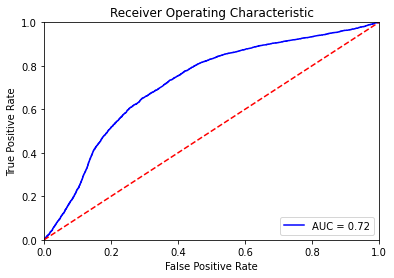

In [124]:
from sklearn.metrics import roc_curve, auc

probs = svmModel.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Naive Bayes

Bayes Theorem
- P(A|B) = (P(B|A) * P(A)) / (P(B))
    - P(A|B) is Posterior Probability
    - P(B|A) is Likelihood
    - P(A) is Prior Probability
    - P(B) is Marginal Likelihood

Lets say we have 10 values of y = 1 and 20 values of y = 0
- Calculate P(A) (Prior Probability)
    - P(A) = 10/30

Lets say we created a radius around the point we want to determine the y outcome of and the radius includes 3 values of y = 1 and 1 value of y = 0 (You determine the radius)
- Calculate P(B) (Marginal Likelihood)
    - P(B) = 4/30
- Calculate P(B|A) (Likelihood)
    - P(B|A) = 3/10
- Calculate P(A|B) (Posterior Probability)
    - P(A|B) = (P(B|A) * P(A)) / (P(B))
    - P(A|B) = (3/10 * 10/30) / (4/30) = 0.75
    
If it is 0.75 for the P(y=1) then it will be 0.25 for the P(y=0) and hence since 0.75 > 0.25, then the y value for the new data point would be 1 more than being 0.


**Question 1:** Why is this called "Naive". This is because it is an independence assumption <br>
**Question 2:** What is P(x)? P(x) or P(B) never changes and is the number of similar observations over the total observations. <br>
**Question 3:** What happens if there are more than 2 classes? If you have 2 classes you only have to calculate 1 but if you have 4 classes then you have to calculate atleast twice.

#### Hyperparameter Tuning

In [80]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# None

#### Build Model on Training Data

In [81]:
naiveBayesModel = GaussianNB()
naiveBayesModel.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

#### Predict on Testing Data

In [82]:
y_pred = naiveBayesModel.predict(X_test)
print(y_pred)

[0. 0. 0. ... 0. 0. 1.]


#### Numeric Analysis

In [83]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix \n")

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")

from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred), ": is the precision score")

from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred), ": is the recall score")

[[5521 1971]
 [2929 4579]] : is the confusion matrix 

0.6733333333333333 : is the accuracy score
0.6990839694656489 : is the precision score
0.6098827916888652 : is the recall score


#### Graphical Analysis

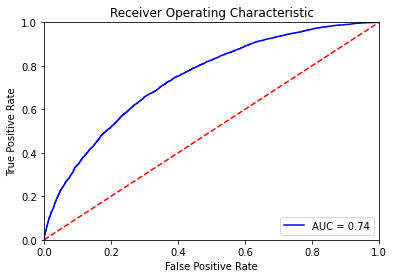

In [116]:
from sklearn.metrics import roc_curve, auc

probs = naiveBayesModel.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Decision Trees

- Step 1: Determine the Root of the Tre
- Step 2: Calculate Entropy for The Classes
- Step 3: Calculate Entropy After Split for Each Attribute
- Step 4: Calculate Information Gain for each split 
- Step 5: Perform the Split
- Step 6: Perform Further Splits
- Step 7: Complete the Decision Tree



Note: Decision Nodes: These type of node have two or more branches <br>
Note: Leaf Nodes: The lowest nodes which represents decision <br>
Note: Root Node: A decision node but at the topmost level <br>

#### Hyperparameter Tuning

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid_dt = {
    'criterion': ['gini', 'entropy'],     # Measure quality of split
    'splitter': ['best', 'random'],       # Strategy used to choose split at each node
    'max_depth': [None, 2, 4, 6, 8, 10],  # Maximum depth of the tree
    #'class_weight': ['balanced']         # Troubleshoot unbalanced data sampling
}

gdDT = GridSearchCV(estimator=DecisionTreeClassifier(random_state=1234), param_grid=param_grid_dt, verbose=True,
                   cv=3, n_jobs=-1)
gdDT.fit(X_train, y_train)
print(gdDT.best_score_)
print(gdDT.best_estimator_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  57 out of  72 | elapsed:    2.5s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    2.6s finished


0.6827777777777778
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1234, splitter='best')


#### Build Model on Training Data

In [86]:
from sklearn.tree import DecisionTreeClassifier
decisionTreeModel = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1234, splitter='best')
decisionTreeModel.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1234, splitter='best')

#### Predict on Testing Data

In [87]:
y_pred = decisionTreeModel.predict(X_test)
print(y_pred)

[0. 1. 0. ... 0. 1. 1.]


#### Numeric Analysis

In [88]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix \n")

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")

from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred), ": is the precision score")

from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred), ": is the recall score")

[[4713 2779]
 [2049 5459]] : is the confusion matrix 

0.6781333333333334 : is the accuracy score
0.6626608400097111 : is the precision score
0.7270911028236547 : is the recall score


#### Graphical Analysis

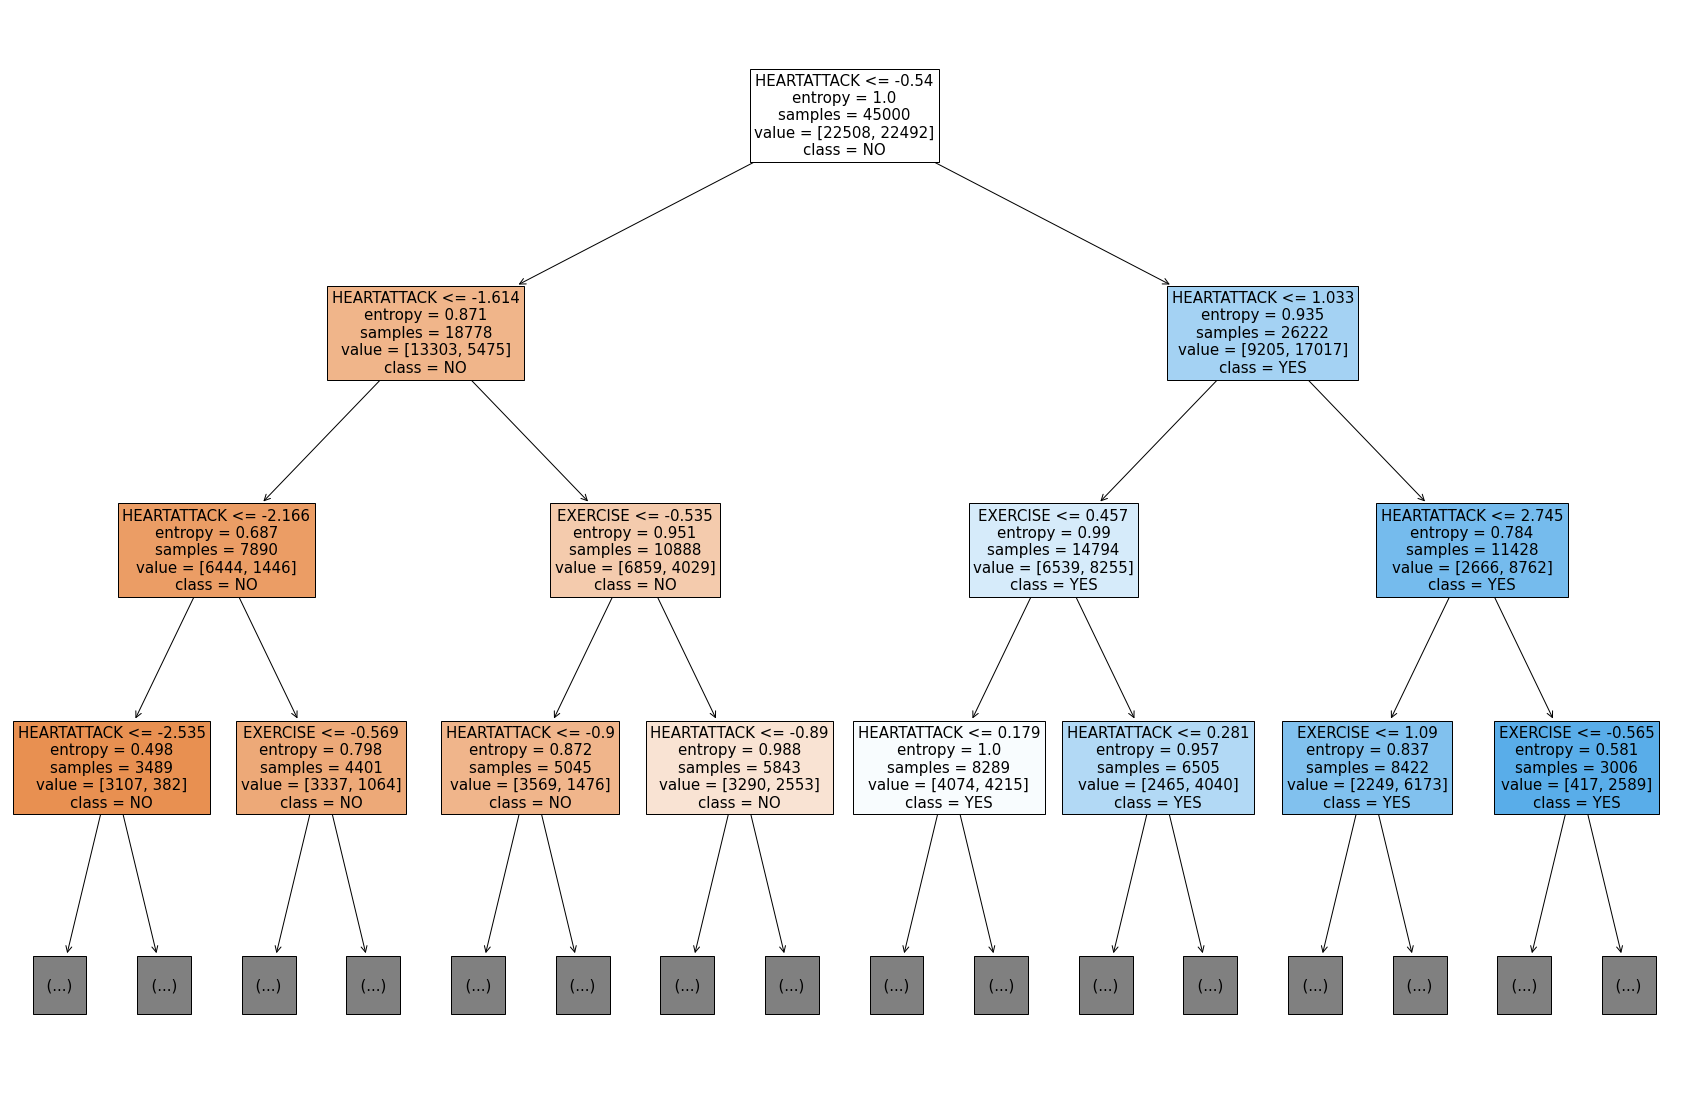

In [89]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(30,20))
_ = plot_tree(decisionTreeModel, 
              max_depth=3, 
              class_names=['NO', 'YES'], 
              feature_names = features, 
              filled=True, 
              fontsize =15)

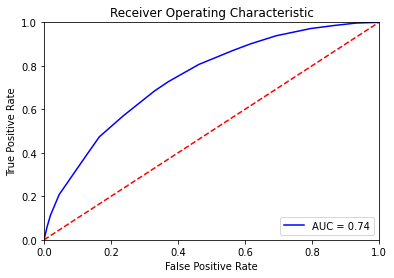

In [117]:
from sklearn.metrics import roc_curve, auc

probs = decisionTreeModel.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Random Forest

- Step 1: Selection of random samples from a given dataset
- Step 2: Algorithm construct decision tree for every sample and prediction result from every decision tree
- Step 3: Vote for every predicted result
- Step 4: Select  most voted prediction result as the final prediction result

This is an ensemble model since it uses many decision tree models together. The estimators is the amount of trees while the entropy specifies the quality of the split (dont want high entropy because it leads to bad information).

#### Hyperparameter Tuning

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'criterion': ['gini', 'entropy'],        # Measure quality of split
    'max_depth': [2, 3, 5, 9],               # Maximum depth of the tree
    'n_estimators': [100, 200, 300, 1000],   # Number of trees in the forest
    #'class_weight': ['balanced']            # Troubleshoot unbalanced data sampling
}

gdRF = GridSearchCV(estimator=RandomForestClassifier(random_state=1234), param_grid=param_grid_rf, verbose=True,
                   cv=3, n_jobs=-1)
gdRF.fit(X_train, y_train)
print(gdRF.best_score_)
print(gdRF.best_estimator_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:  2.5min finished


0.6845555555555556
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)


#### Build Model on Training Data

In [94]:
from sklearn.ensemble import RandomForestClassifier
randomForestModel = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)
randomForestModel.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)

#### Predict on Testing Data

In [103]:
y_pred = randomForestModel.predict(X_test)
print(y_pred)

[0. 1. 0. ... 0. 1. 1.]


#### Numeric Analysis

In [104]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix \n")

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")

from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred), ": is the precision score")

from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred), ": is the recall score")

[[4857 2635]
 [2208 5300]] : is the confusion matrix 

0.6771333333333334 : is the accuracy score
0.6679269061121613 : is the precision score
0.7059136920618008 : is the recall score


#### Graphical Analysis

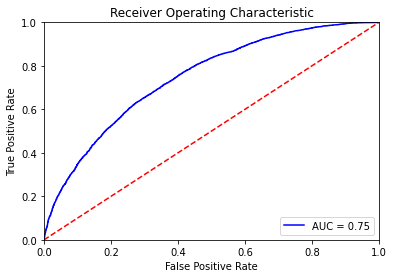

In [118]:
from sklearn.metrics import roc_curve, auc

probs = randomForestModel.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

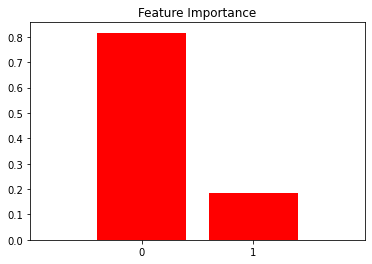

In [131]:
importances = randomForestModel.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(indices)
# plt.xticks(features[indices])  # Use this is not using PCA 
plt.xlim([-1, X.shape[1]])
plt.show()

## XGBoost

#### Hyperparameter Tuning

In [105]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_grid_xgb = {
    'max_depth': [2, 3, 5, 9],                   # Maximum depth of a tree
    'n_estimators': [50, 100, 200, 300, 1000],   # Maximum number of estimators at which boosting is terminated
    'learning_rate': [1, 0.1, 0.01, 0.001],      # Step size shrinkage used in update to prevents overfitting range: [0,1]
    #'class_weight': ['balanced']                # Troubleshoot unbalanced data sampling
}

gdXGB = GridSearchCV(estimator=XGBClassifier(random_state = 1234), param_grid=param_grid_xgb, verbose=True,
                   cv=3, n_jobs=-1)
gdXGB.fit(X_train, y_train)
print(gdXGB.best_score_)
print(gdXGB.best_estimator_)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  5.7min finished


0.6842222222222222
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1234,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


#### Build Model on Training Data

In [100]:
from xgboost import XGBClassifier
xgBoostModel = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1234,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
xgBoostModel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1234,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

#### Predict on Testing Data

In [101]:
y_pred = xgBoostModel.predict(X_test)
print(y_pred)

[0. 1. 0. ... 0. 1. 1.]


#### Numeric Analysis

In [102]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix \n")

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")

from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred), ": is the precision score")

from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred), ": is the recall score")

[[4781 2711]
 [2126 5382]] : is the confusion matrix 

0.6775333333333333 : is the accuracy score
0.6650191523538861 : is the precision score
0.7168353755993607 : is the recall score


#### Graphical Analysis

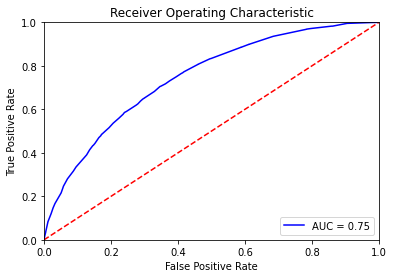

In [119]:
from sklearn.metrics import roc_curve, auc

probs = xgBoostModel.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

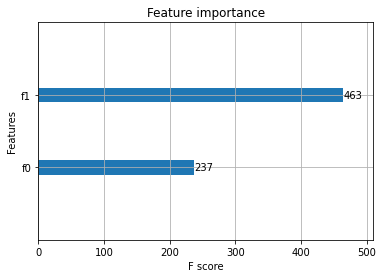

In [125]:
from xgboost import plot_importance
plot_importance(xgBoostModel)
plt.show()

## AdaBoost

For t in T rounds: 
- Step 1: Calculate distribution p by normalizing the weight vector w (the initial weights in w for the first round are 1/N, where N represents the number of labeled examples)
- Step 2: Grow a weak learner (decision tree) using the distribution p; return hypothesis h with prediction values for each example
- Step 3: Calculate error term ε of h
- Step 4: Assign β with ε/(1- ε)
- Step 5: Update the weight vector to w = w*β so that predictions with poor performance will have higher a weight and predictions with better performance will have a lower weight
- Output: final hypothesis is the result of a weighted majority vote of all T weak learners


Combine weak learners (decision trees) <br>
Assigning weights to incorrect values <br>
Sequential tree growing considering past mistakes <br>

#### Hyperparameter Tuning

In [108]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

param_grid_adb = {
    'n_estimators': [50, 100, 200, 300, 1000],   # Maximum number of estimators at which boosting is terminated
    'learning_rate': [1, 0.1, 0.01, 0.001]       # Step size shrinkage used in update to prevents overfitting range: [0,1]   
}

gdADB = GridSearchCV(estimator=AdaBoostClassifier(random_state = 1234), param_grid=param_grid_adb, verbose=True,
                    cv=3, n_jobs=-1)
gdADB.fit(X_train, y_train)
print(gdADB.best_score_)
print(gdADB.best_estimator_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.1min finished


0.6833111111111111
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.01,
                   n_estimators=1000, random_state=1234)


#### Build Model on Training Data

In [109]:
from sklearn.ensemble import AdaBoostClassifier
adaBoostModel = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.01,
                   n_estimators=1000, random_state=1234)
adaBoostModel.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.01,
                   n_estimators=1000, random_state=1234)

#### Predict on Testing Data

In [110]:
y_pred = adaBoostModel.predict(X_test)
print(y_pred)

[0. 1. 0. ... 0. 1. 1.]


#### Numeric Analysis

In [111]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix \n")

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")

from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred), ": is the precision score")

from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred), ": is the recall score")

[[4796 2696]
 [2122 5386]] : is the confusion matrix 

0.6788 : is the accuracy score
0.6664192031675328 : is the precision score
0.7173681406499733 : is the recall score


#### Graphical Analysis

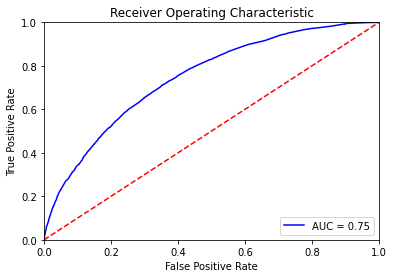

In [120]:
from sklearn.metrics import roc_curve, auc

probs = adaBoostModel.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Model Perfomance Comparison 


|Model|Accuracy Score|Precision Score|Recall Score|
| :-- | :-: | :-: | :-: |
|**Logistic Regression**|0.6778|0.6833|0.6641|
|**K-Nearest Neighbors**|0.6615|0.6555|0.6823|
|**Kernal Support Vector Machine**|0.6764|0.6669|0.7063|
|**Naive Bayes**|0.6733|0.6991|0.6099|
|**Decision Trees**|0.6781|0.6627|0.7271|
|**Random Forest**|0.6771|0.6679|0.7059|
|**XGBoost**|0.6775|0.6650|0.7168|
|**AdaBoost**|0.6788|0.6664|0.7173|

#### Model Advantages / Disadvantages Comparison

|Model|Advantages|Disadvantages|
| :-- | :-- | :-- |
|**Logistic Regression**|<ul><li>Simple to understand, fast and efficient</li></ul>| <ul><li>Too simple to capture complex relationships between variables</li><li>Performs poorly with correlated features</li><li>Seperates data with only linear boundary</li></ul>|
|**K-Nearest Neighbors**|<ul><li>Simple to understand</li><li>Applied to data with linear and non-linear boundaries</li></ul>| <ul><li>Time consuming</li><li>Difficult to find optimized k value</li></ul>|
|**Kernal Support Vector Machine**|<ul><li>High performance on non-linear booundaries</li><li>Not biased to outliers</li><li>Not sensitive to overfitting</li></ul>|<ul><li>Not best for large complex of features</li><li>Compulsory to apply feature scaling</li><li>Complex to understand</li></ul>|
|**Naive Bayes**|<ul><li>Efficient and fast</li><li>Not biased to outliers</li><li>Good performance on non-linear boundaries</li><li>Probablistic approach</li></ul>|<ul><li>Not best for small data</li><li>Based on assumption that features have statistical relevance</li></ul>|
|**Decision Trees**|<ul><li>Interpretability</li><li>Applied to data with linear and non-linear boundaries</li><li>Feature Scaling is not needed</li></ul>|<ul><li>Poor results on small datasets</li><li>Overfitting can easily occur</li></ul>|
|**Random Forest**|<ul><li>Efficient on large datasets</li><li>Applied to data with linear and non-linear boundaries</li><li>Handle missing data</li><li>Robust to outliers</li></ul>|<ul><li>Slow b/c require more trees more better accuracy</li><li>Difficuly interpreting</li></ul>|
|**XGBoost**|<ul><li>Extremely fast because of parallel computation</li><li>Do not require feature engineering</li><li>Heavily used in industries due to its scalability</li></ul>|<ul><li>Only work with numeric features</li><li>Difficult to tune the hyperparameters</li></ul>|
|**AdaBoost**|<ul><li>Fast, simple and easy to program</li><li>Can be combined with any machine learning algorithm</li></ul>|<ul><li>Extremely weak classifiers can lead to overfitting</li><li>Vulnerable to uniform noise</li></ul>|

##### End of document.